In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

/Users/lukejun/miniconda3/envs/sequences/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def read_sequences_from_file(file_name):
    with open(file_name, 'r') as f:
        lines = f.read().replace("\n", "")
    sequences_list = lines.split(",")
    return sequences_list

In [4]:
pathogenic_sequences_list = read_sequences_from_file("Pathogenic.txt")

In [5]:
len(pathogenic_sequences_list)

14

In [6]:
print(pathogenic_sequences_list[0][:20])

NNNNNNNNNNNNNNNNNNNN


In [7]:
benign_sequences_list = read_sequences_from_file("Benign.txt")

In [8]:
print(benign_sequences_list[0][:20])

CATGTCTCATCACACCCTAC


In [9]:
len(benign_sequences_list)

20

In [10]:
likelybenign_sequences_list = read_sequences_from_file("Likely-Benign.txt")

In [11]:
len(likelybenign_sequences_list)

4

In [12]:
print(likelybenign_sequences_list[0][:20])

GGAGGTGGAGGCTGCTGTGA


In [13]:
likelypathogenic_sequences_list = read_sequences_from_file("Likely-Pathogenic.txt")

In [14]:
len(likelypathogenic_sequences_list)

2

In [15]:
print(likelypathogenic_sequences_list[0][:20])

CACCCACCAGTACTTGAAGT


In [16]:
notreported_sequences_list = read_sequences_from_file("Not-Reported.txt")

In [17]:
len(notreported_sequences_list)

97

In [18]:
file_pathogenicity = [1,1,0,0]

In [19]:
file_pathogenicity_data = [pathogenic_sequences_list, likelypathogenic_sequences_list, benign_sequences_list, likelybenign_sequences_list]

In [20]:
all_sequences_data = []
all_sequences_data_target = []

In [21]:
for i in range(len(file_pathogenicity_data)):
    current_sequence_list = file_pathogenicity_data[i]
    for sequence in current_sequence_list:
        all_sequences_data.append(sequence)
        all_sequences_data_target.append(file_pathogenicity[i])

In [22]:
print(len(all_sequences_data))
print(len(all_sequences_data_target))

40
40


In [23]:
print(all_sequences_data[20][:20])

ATCATTCAGAACTATGTGTC


In [24]:
print(all_sequences_data_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
sequence_lengths = []
for s in all_sequences_data:
    sequence_lengths.append(len(s))

In [26]:
average_sequence_length = np.mean(sequence_lengths)

In [27]:
print(average_sequence_length)

18257513.75


In [28]:
median_sequence_length = np.median(sequence_lengths)

In [29]:
print(median_sequence_length)

258362.0


In [30]:
min_length = np.min(sequence_lengths)
max_length = np.max(sequence_lengths)

In [31]:
print(min_length)
print(max_length)

61
181538259


In [32]:
print(sequence_lengths)

[181538259, 181538259, 61, 116, 181538259, 179861636, 258369, 89, 105, 68, 1289, 7111, 10773, 61, 258362, 258362, 193871, 83999, 185646, 98098, 258362, 163074, 169883, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 258362, 903, 105]


In [33]:
np.sum(all_sequences_data_target)

16

In [34]:
def convert_to_num(sequence):
    letter_to_num_map = {"A":"1", "C":"2", "T":"3", "G":"4", "N":"5"}
    converted_sequence = ""
    for s in sequence:
        s_num = letter_to_num_map[s]
        converted_sequence = converted_sequence + s_num
    ## converted_sequence_int = int(converted_sequence)
    return converted_sequence

In [35]:
convert_to_num("ACTGTGTGTGTGCGGAGAGAGTGGGGCGTCGTGATGCAGGCTAGGTCAGANNNNGNANTANCANTNANGANTNN")

'12343434343424414141434444243243413421442314432141555545153152153515415355'

In [36]:
def pad_sequence(sequence, desired_length):
    sequence_length = len(sequence)
    if sequence_length < desired_length:
        num_pads_needed = desired_length - sequence_length
        pad = ""
        for i in range(num_pads_needed):
            pad = pad + "0"
        result = sequence + pad
        return result
    else:
        return sequence

In [37]:
def split_or_pad(sequence, desired_length):
    seq_length = len(sequence)
    if seq_length > desired_length:
        new_sequences = []
        for i in range(0, seq_length, desired_length):
            current_chunk = sequence[i: i + desired_length]
            current_chunk_num = convert_to_num(current_chunk)
            current_chunk_num_padded = pad_sequence(current_chunk_num, desired_length)
            new_sequences.append(current_chunk_num_padded)
        return new_sequences
    else:
        sequence_num = convert_to_num(sequence)
        return [pad_sequence(sequence_num, desired_length)]

In [38]:
sequences_splitted = split_or_pad(all_sequences_data[0], 5000)

In [39]:
split_or_pad(all_sequences_data[2], 5000)

['12144433321412111132111114114411443423212133223311133114414310000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [40]:
cleaned_data = []
cleaned_data_targets = []
for i in range(len(all_sequences_data)):
    print(i)
    current_sequence = all_sequences_data[i]
    if len(current_sequence) > 180000000:
           continue
    cleaned_sequence_list = split_or_pad(current_sequence, 5000)
    for s in cleaned_sequence_list:
        cleaned_data.append(s)
        cleaned_data_targets.append(all_sequences_data_target[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [41]:
print(cleaned_data_targets)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
cleaned_data, cleaned_data_targets = shuffle(cleaned_data, cleaned_data_targets)

In [43]:
print(len(cleaned_data))
print(len(cleaned_data_targets))

37156
37156


In [44]:
print(cleaned_data_targets)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [45]:
print(np.sum(cleaned_data_targets))

36141


In [46]:
print(cleaned_data[-1])

1321214344343334332212142232213422143144144211114111243333213433144221434142113422144143232142344134343214234321341321332211323242344113223421441441444414112122411432232134342213223134221141224132221113332131343443411342114313334321213232144224332322332213233233432332112342212234113332123142132133221422121421334344444114332333432131433421211421214331314321331424134414333232134121121422323111113114221243221142134321421424343214211234221342112341223414133324213411131343111134344143114121344433234111422214232222443223232343423214211411343414241331114132313333312323334411412123113314213311433341333122121433144211113213343331134142212233212114331412442321343312223234131244333432323434322221222111323212333411334311322221314322221343132114442141122221434414431133441321341144344333223224342343323213413113414323213422132341344333313114213234421333222234233421333233323422122234341141114342234233223233213233221221241334311433322341142232222142213423411231341432113311122323331333121113312221432334

In [47]:
print(len(cleaned_data[1]))

5000


In [48]:
n_input, n_hidden, n_out, batch_size, learning_rate = 5000, 500, 1, 1000, 0.01

In [49]:
print(type(cleaned_data[0]))

<class 'str'>


In [50]:
def convert_data_to_batch_size_tensor(cleaned_data, i, j):
    cleaned_data = cleaned_data[i:j]
    xs = np.array([],dtype = np.float64).reshape(0, len(cleaned_data[0]))
    for sequence in cleaned_data:
        sequence_list = [*sequence]
        sequence_array = np.asarray(sequence_list)
        sequence_array_float = sequence_array.astype(np.float64)
        xs = np.vstack([sequence_array_float, xs])
    return xs

In [51]:
t = convert_data_to_batch_size_tensor(cleaned_data, 0, 1000)

In [52]:
t_target = np.asarray(cleaned_data_targets[0:1000]).reshape(1000,1)

In [53]:
t_target.shape

(1000, 1)

In [54]:
data_x = torch.FloatTensor(t)

In [55]:
data_y = torch.FloatTensor(t_target)

In [56]:
print(data_x.size())

torch.Size([1000, 5000])


In [57]:
print(data_y.size())

torch.Size([1000, 1])


In [58]:
model = nn.Sequential(nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid())

In [59]:
print(model)

Sequential(
  (0): Linear(in_features=5000, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=1, bias=True)
  (3): Sigmoid()
)


In [60]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [61]:
losses = []
batch_num = 0
batch_length = 1000
for i in range(0,28000,batch_length):
    t = convert_data_to_batch_size_tensor(cleaned_data, i, i + batch_length)
    t_target = np.asarray(cleaned_data_targets[i:i+batch_length]).reshape(batch_length,1)
    data_x = torch.FloatTensor(t)
    data_y = torch.FloatTensor(t_target)
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    batch_num = batch_num + 1
    print(batch_num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [62]:
losses

[0.588577389717102,
 0.03121795319020748,
 0.03098035790026188,
 0.023985469713807106,
 0.02898371033370495,
 0.02298528142273426,
 0.02698313444852829,
 0.029980821534991264,
 0.028981922194361687,
 0.030055919662117958,
 0.026981879025697708,
 0.033980026841163635,
 0.0319819375872612,
 0.03098195791244507,
 0.030984636396169662,
 0.027982376515865326,
 0.02398732863366604,
 0.02498435415327549,
 0.020986560732126236,
 0.02298627980053425,
 0.03504898026585579,
 0.04297691211104393,
 0.02498568966984749,
 0.023215392604470253,
 0.021987957879900932,
 0.02623532898724079,
 0.0309832114726305,
 0.025985023006796837]

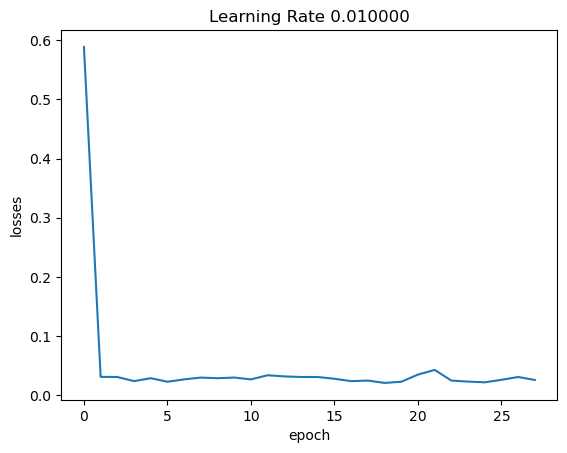

In [63]:
plt.plot(losses)
plt.ylabel("losses")
plt.xlabel("epoch")
plt.title("Learning Rate %f" %(learning_rate))
plt.show()

In [64]:
model = nn.Sequential(nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid())

In [65]:
model.load_state_dict(torch.load("sequence_model.pt"))
model.eval()

Sequential(
  (0): Linear(in_features=5000, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=1, bias=True)
  (3): Sigmoid()
)

In [66]:
iter_num = 0
batch_length = 1000
percentage_correct = []
for i in range(28000,37000,batch_length):
    t = convert_data_to_batch_size_tensor(cleaned_data, i, i + batch_length)
    t_target = np.asarray(cleaned_data_targets[i:i+batch_length]).reshape(batch_length,1)
    data_x = torch.FloatTensor(t)
    data_y = torch.FloatTensor(t_target)
    pred_y = model(data_x)
    pred_y_array = pred_y.detach().numpy()
    pred_y_array = np.round(pred_y_array)
    num_correct = (t_target == pred_y_array).sum()
    percentage_correct.append(num_correct/batch_length)
    print(num_correct)

972
975
972
980
979
966
974
978
974


In [67]:
np.mean(percentage_correct)

0.9744444444444444

In [68]:
torch.save(model.state_dict(), "sequence_model.pt")